In [1]:
import os # Import OS module to allow us to run a command in the Python script.

import pandas as pd # Bring the pandas data analysis library into your current environment

import numpy as np # Bring the NumPy library into your current environment

import matplotlib.pyplot as plt # Bring a collection of funtions for image visualization

# Tell Jupyter Notebook to draw the plots immediately after the current cell
%matplotlib inline 

import seaborn as sns # Bring the Seaborn library into current environment to visualize random distributions

from tensorflow import keras # Bring Keras high-level neural network library from tensorflow

import tensorflow as tf # Bring tensorflow into the current environment

from tensorflow.keras import layers # Bring basic building blocks of neural networks in Keras

from sklearn.model_selection import train_test_split # Bring train_test_spilt function into the
#current environment to split arrays or matrices into random subsets for train and test data, respectively

import warnings # Bring warnings module to warn people about changes in language or library features
#in anticipation of backwards incompatible changes coming with Python 3.0 

import csv # Used for importing a csv module that is used for parsing tabular in excel format, and these files are saved in

warnings.filterwarnings('ignore') # To ignore warnings from specified module

In [2]:
import cv2 # Bring openCV-python into the current environment

from PIL import Image # Provide the Python interpreter with image editing capabilities

In [3]:
train_image = [] # Create an empty list to store images

train_annotation = [] # Create an empty list to store the coordinates of bounding boxes

In [4]:
import glob # Bring glob module to retrieve files/pathnames matching a specified pattern

path = "/Users/shenx/292_project/drone_dataset_yolo/dataset_txt/*.jpg" # Specify the current path of our data sets

image_file = glob.glob(path,recursive = True) # Recursively retrieve paths to the .jpg files

In [5]:
image_file # Show the paths of our every image data set

['/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0001.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0003.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0004.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0005.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0006.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0007.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0008.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0009.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0010.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0011.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0012.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0013.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0014.jpg',
 '/Users/shenx/292_project/drone_dataset_yolo/dataset_txt\\0015.jpg',
 '/Users/shenx/292_p

In [6]:
for i in image_file:     # Slicing for insufficient memory
    Load_image = Image.open(i).convert('RGB') # Open every image file in our dataset and convert them into RGB format
    nmpy_img = Load_image.resize((258,258)) # Resize every load_image into 258 × 258 pixels
    train_image.append(np.asarray(nmpy_img)) # Convert resized image into an array and append it into train_image list
    
    seperate_path = i.split('.') # These two lines is to change the file format from .jpg to .txt
    seperate_path[1] = '.txt' # These two lines is to change the file format from .jpg to .txt
    
    with open(seperate_path[0]+seperate_path[1]) as f: # Open the .txt file consponding to the .jpg file
        lines = f.readlines() # Return all lines in the file to make sure we got all the information
        tmp_lst = lines[0].split(' ') #Use split method to make the datas into a list
        # label = int(tmp_lst[0])
        startX = float(tmp_lst[1]) # Define the top left x coordinate using the second data in the list
        startY = float(tmp_lst[2]) # Define the top left y coordinate using the third data in the list
        endX = float(tmp_lst[3]) # Define the bottom right y coordinate using the fourth data in the list
        endY = float(tmp_lst[4]) # Define the top right y coordinate using the fifth data in the list
        train_annotation.append((startX, startY, endX, endY)) # Append the four coordinates as a turple into train_annotation

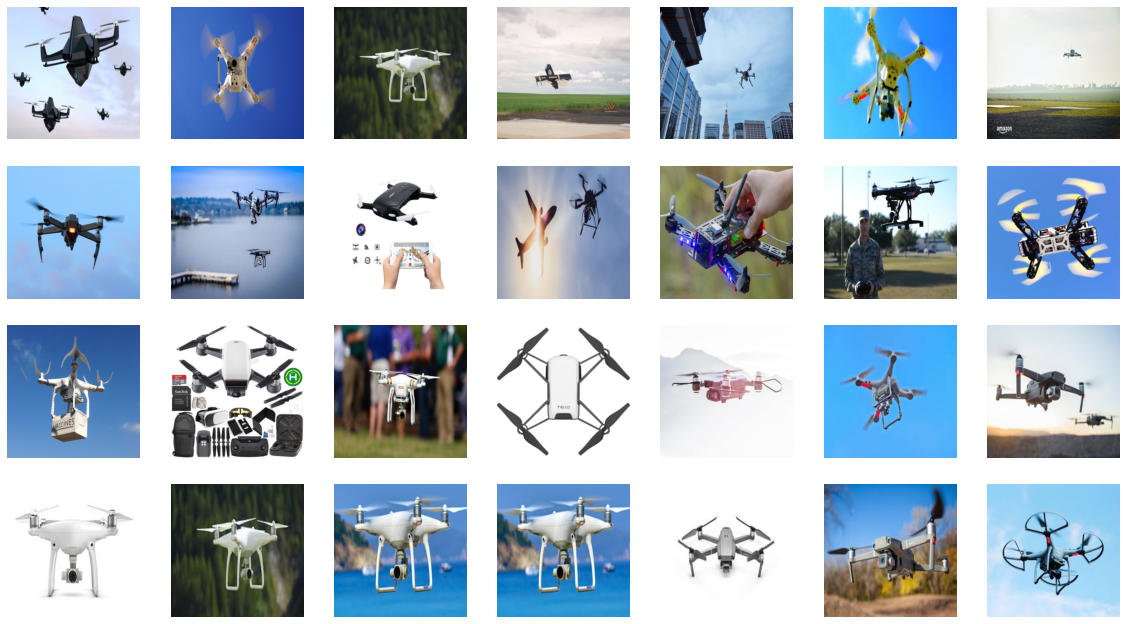

In [7]:
# Plot some sample pictures
plt.figure(figsize=(20, 20))

for i in range(28): # Try to show 28 images
    ax = plt.subplot(7, 7, i + 1)# Define a space for 49 images, but we only choose to show 28 images
    plt.imshow(train_image[i].astype("uint8")) # Convert whatever we give it to a 8 bit integer
    plt.axis("off") # Remove axis

In [8]:
# Import train_test_split to split original data into training and testing dataset

from sklearn.model_selection import train_test_split
data = np.array(train_image, dtype='float32') / 255.0   # Memory not sufficient !!
targets = np.array(train_annotation, dtype='float32')

# Split data into 90% training data and 10% test data and save them into split
split = train_test_split(data, targets, test_size=0.10, random_state=42)

# Split the Images's training and testing data
(trainImages, testImages) = split[:2]
# Split the Target's training and testing data
(trainTargets, testTargets) = split[2:4]

In [9]:
trainImages

array([[[[0.1764706 , 0.1764706 , 0.28627452],
         [0.18431373, 0.18039216, 0.30588236],
         [0.19215687, 0.1882353 , 0.32156864],
         ...,
         [0.54509807, 0.42745098, 0.4117647 ],
         [0.46666667, 0.3647059 , 0.34901962],
         [0.41568628, 0.3137255 , 0.30980393]],

        [[0.1764706 , 0.17254902, 0.28235295],
         [0.18039216, 0.1764706 , 0.30588236],
         [0.1882353 , 0.18431373, 0.31764707],
         ...,
         [0.6862745 , 0.5647059 , 0.53333336],
         [0.58431375, 0.47058824, 0.44705883],
         [0.4509804 , 0.3372549 , 0.33333334]],

        [[0.17254902, 0.16862746, 0.2784314 ],
         [0.1764706 , 0.17254902, 0.3019608 ],
         [0.18431373, 0.18039216, 0.3137255 ],
         ...,
         [0.62352943, 0.49411765, 0.4392157 ],
         [0.5764706 , 0.45490196, 0.41960785],
         [0.57254905, 0.4509804 , 0.43529412]],

        ...,

        [[0.11764706, 0.11764706, 0.11764706],
         [0.11764706, 0.11764706, 0.11764706]

In [10]:
# Check the size of data and target
data.shape, targets.shape

((1359, 258, 258, 3), (1359, 4))

In [11]:
# Import tensorflow.keras model to build neural networks.
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Model,Input

# Deep Convolutional Networks for Large-Scale Image Recognition.
def build_model():
    # Instantiates the VGG16 pretrained model.
    # Set value for the pre-trained weights,input_tensors.
    # Include_top : we do not have 3 fully-connected layers at the top of the network.
    vgg = tf.keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(258, 258, 3)))

    vgg.trainable = True
    # vgg output : Flatten the high dimension. 
    flatten = vgg.output
    flatten = Flatten()(flatten)
    # Build the 4 nerual networks layers.
    # Build the first layer with 128 Neurons, the activation function is relu.
    # Build the second layer with 64 Neurons, the activation function is relu.
    # Build the third layer with 32 Neurons, the activation function is relu.
    # Build the last layer with 4 Neurons, the activation function is linear.
    # Output would be 4 indexs of bounding box.
    bboxHead = Dense(128, activation="relu")(flatten)
    bboxHead = Dense(64, activation="relu")(bboxHead)
    bboxHead = Dense(32, activation="relu")(bboxHead)
    bboxHead = Dense(4, activation="linear")(bboxHead)
    # Generate Model
    model = Model(inputs=vgg.input, outputs=bboxHead)
    
    return model

In [12]:
# Build Model
model = build_model()

In [13]:
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 258, 258, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 258, 258, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 258, 258, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 129, 129, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 129, 129, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 129, 129, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
# Compile the model with optimizer.

# Set learning_rate, loss function, accuracy metrices.

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

# Define the CallBack API to save the Keras model or model weights.

# Set the "val_loss" to monitor the model's total loss.

# Only saves when the model is considered the "best" and the latest best model according to the quantity monitored
# will not be overwritten.

# Verbose:Verbosity mode 1 displays messages when the callback takes an action.

save_best = tf.keras.callbacks.ModelCheckpoint("Model.h5",monitor='val_loss',save_best_only=True, verbose=1)

In [18]:
# Training Model

# Validation_split was set to 0.2 to shuffles the data into 80% tarining data and 20% validation data.

# Callback set as the save_best we defined before.

# Set batch_size to 16 for each round.

# Set epoches equals to 50 training round.
model.fit(trainImages, trainTargets, validation_split=0.2, batch_size= 16, epochs=50, verbose=1, callbacks=[save_best])

Epoch 1/50
62/62 [==============================] - ETA: 0s - loss: 28.4446 - accuracy: 0.4663
Epoch 1: val_loss improved from inf to 0.03860, saving model to Model.h5
62/62 [==============================] - 326s 5s/step - loss: 28.4446 - accuracy: 0.4663 - val_loss: 0.0386 - val_accuracy: 0.6082
Epoch 2/50
62/62 [==============================] - ETA: 0s - loss: 0.0340 - accuracy: 0.6339
Epoch 2: val_loss improved from 0.03860 to 0.03710, saving model to Model.h5
62/62 [==============================] - 321s 5s/step - loss: 0.0340 - accuracy: 0.6339 - val_loss: 0.0371 - val_accuracy: 0.6082
Epoch 3/50
62/62 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.6339
Epoch 3: val_loss did not improve from 0.03710
62/62 [==============================] - 320s 5s/step - loss: 0.0327 - accuracy: 0.6339 - val_loss: 0.0648 - val_accuracy: 0.6082
Epoch 4/50
62/62 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.6319
Epoch 4: val_loss improved from 0.0

Epoch 30/50
62/62 [==============================] - ETA: 0s - loss: 0.0127 - accuracy: 0.7740
Epoch 30: val_loss did not improve from 0.01841
62/62 [==============================] - 415s 7s/step - loss: 0.0127 - accuracy: 0.7740 - val_loss: 0.0192 - val_accuracy: 0.7143
Epoch 31/50
62/62 [==============================] - ETA: 0s - loss: 0.0129 - accuracy: 0.7822
Epoch 31: val_loss did not improve from 0.01841
62/62 [==============================] - 413s 7s/step - loss: 0.0129 - accuracy: 0.7822 - val_loss: 0.0186 - val_accuracy: 0.7265
Epoch 32/50
62/62 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.6656
Epoch 32: val_loss did not improve from 0.01841
62/62 [==============================] - 416s 7s/step - loss: 0.0315 - accuracy: 0.6656 - val_loss: 0.0312 - val_accuracy: 0.6408
Epoch 33/50
62/62 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.6830
Epoch 33: val_loss did not improve from 0.01841
62/62 [==============================]

In [15]:
# Loads a model saved via model.save()
model = tf.keras.models.load_model('Model.h5')

In [16]:
# Use the model to predict the output
Predict_output = model.predict(trainImages[:], verbose=1)
Predict_output

39/39 [==============================] - 148s 4s/step


array([[0.54451954, 0.38272905, 0.8009584 , 0.6606338 ],
       [0.5718283 , 0.36878902, 0.71051013, 0.48409605],
       [0.4930919 , 0.5477278 , 0.43913537, 0.46911   ],
       ...,
       [0.47052932, 0.47668865, 0.593039  , 0.6450203 ],
       [0.5136216 , 0.24080391, 0.7621362 , 0.45605162],
       [0.44330972, 0.66478807, 0.3709462 , 0.22035751]], dtype=float32)

In [17]:
# Actual output
Actual_output = trainTargets[:]
Actual_output

array([[0.520417, 0.547619, 0.959167, 0.844444],
       [0.591   , 0.439   , 0.588   , 0.25    ],
       [0.442083, 0.594881, 0.4575  , 0.573034],
       ...,
       [0.45    , 0.473   , 0.526   , 0.757   ],
       [0.537879, 0.271382, 0.90303 , 0.411184],
       [0.347039, 0.673977, 0.648026, 0.330409]], dtype=float32)

In [18]:
# Open the CSV file and save the predict_output data
with open('Model_predict.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(Predict_output)
# Open the CSV file and save the actural_output data
with open('Model_actual.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(Actual_output)